In [5]:
"""
Uses the Fox-Goodwin method to solve for the radial component of an
angular momentum state of the radial Schroedinger equation
"""
def solve(l : int, E : float, h2m : float, V : np.array, r : np.array, u : np.array):
    grid_size = V.size
    assert(r.size == grid_size)
    assert(u.size == grid_size)
    deltar = r[1:] - r[:-1]
    h = deltar[0]

    # set up potentials
    w    = (E - V) / h2m  - l * (l + 1) / r**2
    w[0] = np.complex(0,0)

    # finite difference: fox-goodwin scheme O(deltar^4)
    k = h**2/12
    for i in range(1,grid_size-1):
        u[i+1] = (2*u[i] - u[i-1] - k * (10 * w[i] * u[i] + w[i-1] * u[i-1])) /\
                 (1 + k * w[i+1] )

    return u


<ipython-input-5-3c4ddc857760>:13: RuntimeWarning: divide by zero encountered in true_divide
  w    = (E - V) / h2m  - l * (l + 1) / r**2
<ipython-input-36-8e9ce6e253da>:36: RuntimeWarning: invalid value encountered in true_divide
  u =  (solve(l,En,h2m,V,r,u)/r)[1:]


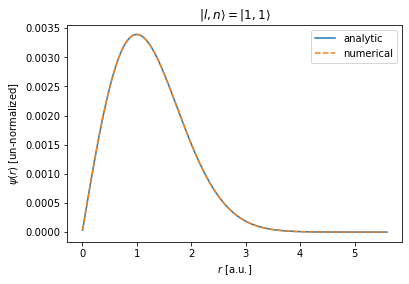

In [36]:
%matplotlib inline

import numpy as np
from scipy.special import genlaguerre as Lag
import matplotlib.pyplot as plt

# physical constants and parameters
hbar = 1 # if you're not using natural units, get a life
m = 1
omega = 1
h2m = hbar/(2*m)
l = 1
n = 1
if (n-l)%2 == 0: 
    k = (n-l)/2
else: 
    k = 0
En = hbar * omega * (n + 3/2) 

# radial grid
# RMAX can't be too big or numerical instabilties will result
RMAX = 2.5*np.sqrt(2*En/(m*omega)) # extend into forbidden region (E < V)
NR   = 1000
r  = np.linspace(0,RMAX,NR)



# potential 
V = np.zeros(r.shape, dtype="cdouble")
V.real = 1/2 * m * omega**2 * r**2

# wavefunction
u    = np.zeros(V.shape, dtype="cdouble") # complex
u[1] = np.complex(1,1) # boundary condition 

u =  (solve(l,En,h2m,V,r,u)/r)[1:]

L = Lag(k,l+1/2)
analytic = (r**l * np.exp(- m*omega/(2*hbar) * r**2) * L( (2*m*omega)/(2*hbar) * r**2 ))[1:]

plt.title(r"$|l,n\rangle = |{},{}\rangle$".format(l,n))
rho = (u.real**2 + u.imag**2)
plt.plot(r[1:],analytic/np.sum(analytic),label=r"analytic")
plt.plot(r[1:],u.real/np.sum(u.real) ,'--',label=r"numerical")
#plt.plot(r,u.imag/np.sum(u.imag),label=r"Im[$\psi$]")
#plt.plot(r,rho/np.sum(rho),label=r"$\|\psi\|^2$")
plt.xlabel(r"$r$ [a.u.]")
plt.ylabel(r"$\psi(r)$ [un-normalized]")
plt.legend()
#plt.tight_layout()
plt.show()


# I've just solved the simple benchmark here
# it may be interesting to explore some of the following
# --> elementary exploration of QHO solution parameters (m,omega)
# --> when does the fox-goowin solver fail? (what energies, grid spacings, RMAXs, l's, etc.). Why do you think that is?
# --> Try an non infinite (scattering) potential
# --> try adding complex terms to your potential
# --> can you compose your work in problem 2 and calculate cross sections? (To see how this is done, check out https://github.com/beykyle/opxs)